In [104]:
import pandas as pd
import numpy as np
import spacy 
import re


In [105]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

In [119]:
data=pd.read_csv("twitter4000.csv",encoding="latin1")

In [120]:
data

,twitts,sentiment
0,is bored and wants to watch a movie any sugge...,0
1,back in miami. waiting to unboard ship,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0
3,ughhh i am so tired blahhhhhhhhh,0
4,@mandagoforth me bad! It's funny though. Zacha...,0
...,...,...
3995,i just graduated,1
3996,Templating works; it all has to be done,1
3997,mommy just brought me starbucks,1
3998,@omarepps watching you on a House re-run...lov...,1


**Count URLs and Remove it**

In [121]:
data["url_flags"]=data["twitts"].apply(lambda x: len(re.findall(r'(http|https|ftp|ssh)://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',x)))

In [122]:
data[data["url_flags"]>0].sample(5)

,twitts,sentiment,url_flags
2620,#eric in the clear! latest @VeronicaDLCruz twl...,1,1
3769,is With her sister arianne http://plurk.com/p...,1,1
2467,Woot.going to gibalter. http://myloc.me/2bZ6,1,1
3627,"Oh, do I love your choice in music, @MsKittyCu...",1,1
899,My dog has been missing since Wednesday night ...,0,1


In [123]:
#removing urls
data["url_flags"]=data["twitts"].apply(lambda x: len(re.sub(r'(http|https|ftp|ssh)://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',"",x)))

In [124]:
data.sample(5)

,twitts,sentiment,url_flags
1707,Another dull fest in the F1 again,0,34
3199,yaaaaay! facebook works!,1,25
1308,"@ladyleolove nah no nerves hit,seems ur trying...",0,132
3588,@ladygaga Listening to your album right now. B...,1,66
2510,@dcamacho now i got @TheCigarSpy followed also...,1,106




# **Remove Special Character or Punctuation**

In [125]:
data[data["twitts"].str.contains("rt")]#remove retweets

,twitts,sentiment,url_flags
4,@mandagoforth me bad! It's funny though. Zacha...,0,142
23,"ut oh, I wonder if the RAM on the desktop is s...",0,60
59,@paulmccourt dunno what sky you're looking at!...,0,95
75,Im back home in Belfast im realli tired thoug...,0,106
81,@lilmonkee987 i know what you mean... i feel s...,0,59
...,...,...,...
3913,For The Press So After She Recovered She Kille...,1,124
3919,earned her CPR &amp; First Aid certifications!,1,47
3945,"@teciav &quot;i look high, i look low, i look ...",1,129
3951,I am soo very parched. And hungry. Oh and I'm ...,1,108


In [130]:
data["twitts"]=data["twitts"].apply(lambda x:re.sub(r'[^\w ]+','',x))

In [131]:
data.sample(5)

,twitts,sentiment,url_flags
2302,will now party after working hard today,1,41
2595,twittopher thats better good to hear you two a...,1,90
1907,JillianValentin i dont think you kno who i am ...,0,126
2467,Wootgoing to gibalter httpmylocme2bZ6,1,25
1282,My hair is bad today,0,21


**Remove HTML tags**

In [132]:
from bs4 import BeautifulSoup

In [133]:
#if
x="<html><h1>thanks for watching </h1></html>"


x.replace("<html><h1>"," ").replace("</h1></html>"," ")# but not recomended



' thanks for watching  '

In [134]:
BeautifulSoup(x,"lxml").get_text().strip()

'thanks for watching'

In [135]:
  %%time
  data["twitts"]=data["twitts"].apply(lambda x:BeautifulSoup(x,"lxml").get_text().strip())

CPU times: user 976 ms, sys: 69.7 ms, total: 1.05 s
Wall time: 1.32 s


In [136]:
data.sample(5)

,twitts,sentiment,url_flags
2824,Just got home from Winco,1,25
1365,Commercials are soooo annoyingggggg,0,36
3472,rachelguglielmo most excellent I got to do a l...,1,133
1887,andddd its time for bed i still havent caught ...,0,102
446,stePRINCE life will be better soon,0,37


### Remove accented chars

In [137]:
import unicodedata 

In [138]:
def remove_accented_chars(x):
  x=unicodedata.normalize("NFKD",x).encode("ascii","ignore").decode("utf-8","ignore")
  return x


### **Convert into base or root form of word**

In [139]:
nlp=spacy.load("en_core_web_sm")

In [140]:
x="this is chocolates what is  times? this is balls"

In [145]:

def make_to_base(x):
  x=str(x)
  x_list=[]
  doc=nlp(x)

  for token in doc:
    lemma=token.lemma_
    if lemma== "-PRON-" or lemma=="be":
       lemma=token.text
    x_list.append(lemma)
  return " ".join(x_list)


In [146]:
make_to_base(x)#base form of a word

'this is chocolate what is   time ? this is ball'

In [147]:
data['twitts']=data["twitts"].apply(lambda x:make_to_base(x))

In [144]:
data

,twitts,sentiment,url_flags
0,is bored and want to watch a movie any suggestion,0,53
1,back in miami wait to unboard ship,0,40
2,misskpey awwww dnt dis brng bak memoriessss -P...,0,66
3,ughhh i am so tired blahhhhhhhhh,0,33
4,mandagoforth -PRON- bad -PRON- funny though Za...,0,142
...,...,...,...
3995,i just graduate,1,17
3996,templating work -PRON- all have to be do,1,41
3997,mommy just bring -PRON- starbuck,1,32
3998,omarepps watch -PRON- on a House rerunlovin -P...,1,53


**Remove common words**

In [148]:
text=" ".join(data["twitts"])

In [150]:
text=text.split()

In [159]:
freq_comm=pd.Series(text).value_counts()

In [160]:
f20=freq_comm[:20]

In [164]:
data["twitts"]=data["twitts"].apply(lambda x:" ".join([t for t in x.split() if t not in f20]))

In [165]:
data.sample(5)

,twitts,sentiment,url_flags
1958,uncleo awwww poor babymaybe time start blockin...,0,63
1091,starkness unfortunately only flash stream work,0,59
3496,Peter Martijn Wijnia sacrifice Vast vision rem...,1,77
403,iDavidCharles think thunder shake house lil bi...,0,102
1051,oh nomy lab limp Something wrong w front rt pa...,0,102


**Removal of Rare Words**

In [170]:
rare20=freq_comm.tail(20)

In [171]:
data["twitts"]=data["twitts"].apply(lambda x:" ".join([t for t in x.split() if t not in rare20]))

In [172]:
data.sample(5)

,twitts,sentiment,url_flags
172,Head split again if was single last nite would...,0,134
1023,LaurenConrads last episode,0,29
1424,Liljudy95 Aww whoever Anita Lazo Was sure Was ...,0,84
2,misskpey awwww dnt dis brng bak memoriessss th...,0,66
2270,tventura pretty sure are stick with very long ...,1,95


**Word Cloud Visualization**

In [175]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [176]:
text=" ".join(data["twitts"])

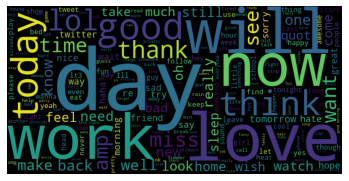

In [178]:
wc=WordCloud(width=800,height=400).generate(text)
plt.imshow(wc)
plt.axis("off")
plt.show()

**Spelling Correction**

In [180]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [181]:
from textblob import TextBlob

In [182]:
x="thankkks forr watching itt"


In [185]:
x=TextBlob(x).correct()

In [186]:
x

TextBlob("thanks for watching it")